In [19]:
import pandas as pd
import numpy as np
import time

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
import seaborn as sns

from lda_model import simple_cleaner

In [244]:
df1a = pd.read_csv('arxiv_datasets/cs.AI_1.csv')
df1b = pd.read_csv('arxiv_datasets/cs.AI_2.csv')
df2 = pd.read_csv('arxiv_datasets/cs.CC.csv')
df3 = pd.read_csv('arxiv_datasets/cs.CE.csv')
df4 = pd.read_csv('arxiv_datasets/cs.CG.csv')
df5 = pd.read_csv('arxiv_datasets/cs.CL.csv')
df6a = pd.read_csv('arxiv_datasets/cs.CV_1.csv')
df6b = pd.read_csv('arxiv_datasets/cs.CV_2.csv')
df7 = pd.read_csv('arxiv_datasets/cs.CY.csv')
df8 = pd.read_csv('arxiv_datasets/cs.DB.csv')
df9 = pd.read_csv('arxiv_datasets/cs.DC.csv')
df10 = pd.read_csv('arxiv_datasets/cs.DL.csv')
df11 = pd.read_csv('arxiv_datasets/cs.DS.csv')
df12 = pd.read_csv('arxiv_datasets/cs.ET.csv')
df13 = pd.read_csv('arxiv_datasets/cs.FL.csv')
df14 = pd.read_csv('arxiv_datasets/cs.GL.csv')
df15 = pd.read_csv('arxiv_datasets/cs.GR.csv')
df16 = pd.read_csv('arxiv_datasets/cs.GT.csv')
df17 = pd.read_csv('arxiv_datasets/cs.AR.csv')
df18 = pd.read_csv('arxiv_datasets/cs.HC.csv')
df19 = pd.read_csv('arxiv_datasets/cs.IR.csv')
df20 = pd.read_csv('arxiv_datasets/cs.IT.csv')
df21 = pd.read_csv('arxiv_datasets/cs.LO.csv')
df22a = pd.read_csv('arxiv_datasets/cs.LG_1.csv')
df22b = pd.read_csv('arxiv_datasets/cs.LG_2.csv')
df22c = pd.read_csv('arxiv_datasets/cs.LG_3.csv')
df23 = pd.read_csv('arxiv_datasets/cs.MA.csv')
df24 = pd.read_csv('arxiv_datasets/cs.MS.csv')
df25 = pd.read_csv('arxiv_datasets/cs.NI.csv')
df26 = pd.read_csv('arxiv_datasets/cs.NE.csv')
df27 = pd.read_csv('arxiv_datasets/cs.NA.csv')
df28 = pd.read_csv('arxiv_datasets/cs.OS.csv')
df29 = pd.read_csv('arxiv_datasets/cs.PF.csv')
df30 = pd.read_csv('arxiv_datasets/cs.PL.csv')
df31 = pd.read_csv('arxiv_datasets/cs.RO.csv')
df32 = pd.read_csv('arxiv_datasets/cs.SI.csv')
df33 = pd.read_csv('arxiv_datasets/cs.SD.csv')
df34 = pd.read_csv('arxiv_datasets/cs.SE.csv')
df35 = pd.read_csv('arxiv_datasets/cs.SC.csv')
df36 = pd.read_csv('arxiv_datasets/cs.SY.csv')
df37 = pd.read_csv('arxiv_datasets/cs.CR.csv')
df38 = pd.read_csv('arxiv_datasets/cs.DM.csv')

In [245]:
df = pd.concat([df1a,df1b,df2,df3,df4,df5,df6a,df6b,df7,df8,df9,df10,
                df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,
                df21,df22a,df22b,df22c,df23,df24,df25,df26,df27,df28,df29,df30,
                df31,df32,df33,df34,df35,df36,df37,df38]).reset_index(drop=True)

In [246]:
df = df.drop_duplicates().reset_index(drop=True)[['Title','Published','Summary']]
df.shape

(582340, 3)

In [247]:
start_time = time.time()
df['cleaned_text'] = df['Summary'].apply(simple_cleaner)
print(time.time()-start_time)

92.90267729759216


In [248]:
df.head(2)

,Title,Published,Summary,cleaned_text
0,Domain-Independent Dynamic Programming,2024-01-25T01:48:09Z,"For combinatorial optimization problems, mod...",combinatorial optimization problem modelbased ...
1,Agent-based Simulation with Netlogo to Evaluat...,2024-01-25T13:05:06Z,In this paper an agent-based simulation is d...,paper agentbased simulation developed order ev...


In [249]:
from collections import Counter

In [250]:
df['pub_date'] = pd.to_datetime(df['Published']).dt.date

date_df = pd.DataFrame(df.groupby('pub_date')['cleaned_text'].sum()).reset_index()
date_df['number_of_papers'] = [num for num in df.groupby('pub_date')['cleaned_text'].count()]

print(time.time()-start_time)

date_df

100.19385099411011


,pub_date,cleaned_text,number_of_papers
0,2012-09-12,backpropagation algorithm one widely used popu...,18
1,2012-09-13,theory random real number exceedingly welldeve...,12
2,2012-09-14,automatic text summarization preprocessing imp...,32
3,2012-09-15,several variant constraint satisfaction proble...,21
4,2012-09-16,present framework largescale distributed escie...,10
...,...,...,...
4107,2024-01-27,diffusion planning recognized effective decisi...,181
4108,2024-01-28,predicting next activity ongoing process one c...,187
4109,2024-01-29,answering complex logical query incomplete kno...,501
4110,2024-01-30,difficulty one key driver player engagement of...,507


In [251]:
date_df['cleaned_text'].str.split().apply(Counter)
print(time.time()-start_time)

110.05406093597412


In [252]:
date_df['number_of_tokens'] = date_df['cleaned_text'].str.split().apply(len)
print(time.time()-start_time)

112.79473185539246


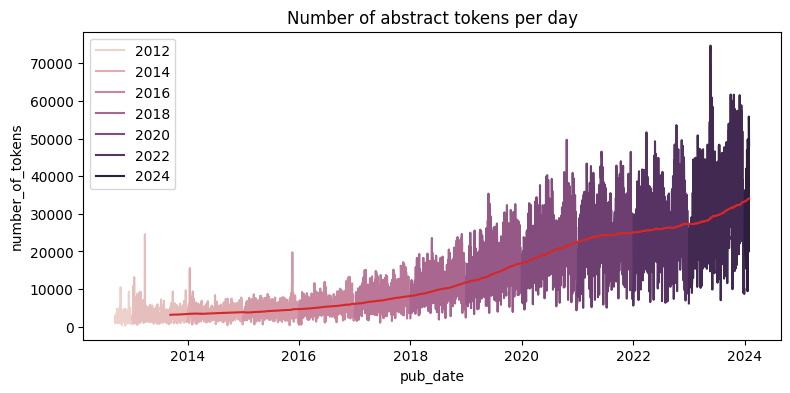

In [253]:
plt.figure(figsize=(9,4))
sns.lineplot(y=date_df['number_of_tokens'], x=date_df['pub_date'], hue=pd.to_datetime(date_df['pub_date']).dt.year)
sns.lineplot(y=date_df['number_of_tokens'].rolling(360).mean(), x=date_df['pub_date'])
plt.title('Number of abstract tokens per day');

In [254]:
date_df['unique_tokens'] = date_df['cleaned_text'].str.split().apply(set).apply(len)
print(time.time()-start_time)

121.18160200119019


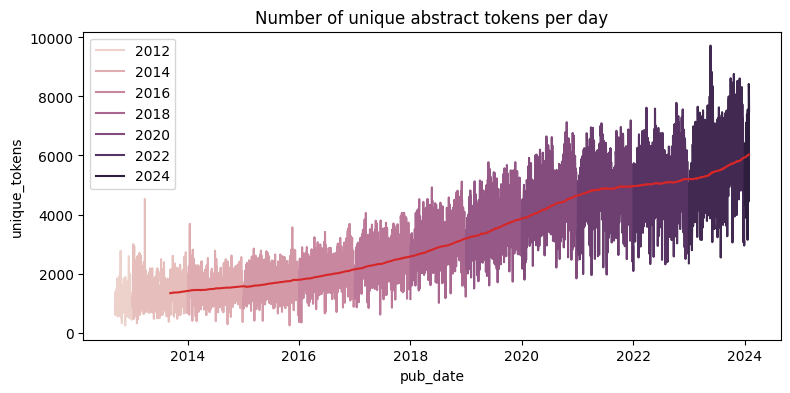

In [255]:
plt.figure(figsize=(9,4))
sns.lineplot(y=date_df['unique_tokens'], x=date_df['pub_date'], hue=pd.to_datetime(date_df['pub_date']).dt.year)
sns.lineplot(y=date_df['unique_tokens'].rolling(360).mean(), x=date_df['pub_date'])
plt.title('Number of unique abstract tokens per day');

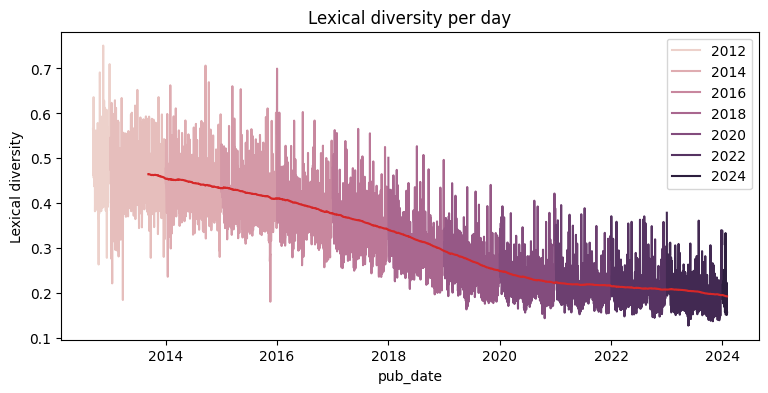

In [256]:
plt.figure(figsize=(9,4))
sns.lineplot(y=date_df['unique_tokens'] / date_df['number_of_tokens'], x=date_df['pub_date'], hue=pd.to_datetime(date_df['pub_date']).dt.year)
sns.lineplot(y=(date_df['unique_tokens'] / date_df['number_of_tokens']).rolling(360).mean(), x=date_df['pub_date'])
plt.ylabel("Lexical diversity")
plt.title('Lexical diversity per day');

### Creating Word Vectors

In [257]:
from sklearn.feature_extraction.text import CountVectorizer

In [258]:
#### turn the text strings into token vectors
#### but only if a token appears in at least 5 documents 
count_text_vectorizer = CountVectorizer(min_df=100)
count_text_vectors = count_text_vectorizer.fit_transform(date_df['cleaned_text'])

print(time.time()-start_time)

136.1998372077942


In [259]:
count_text_vectors.shape

(4112, 13854)

In [260]:
count_text_vectorizer.get_feature_names_out()

array(['000', '0001', '001', ..., 'zoom', 'zooming', 'zsl'], dtype=object)

In [261]:
date_df = pd.concat([date_df,pd.DataFrame(count_text_vectors.toarray(), columns=count_text_vectorizer.get_feature_names_out())],axis=1)

print(time.time()-start_time)

136.4221920967102


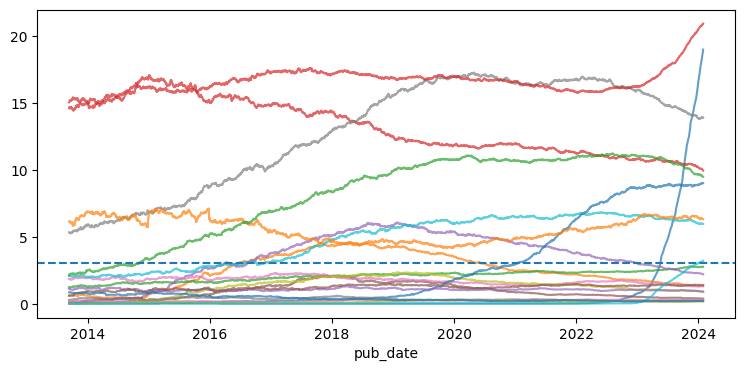

In [283]:
plt.figure(figsize=(9,4))
token_list = ['llm', 'recurrent', 'optimize', 'optimal', 'cnn', 'rnn', 'neighbor',
             'architecture', 'lstm', 'transfer', 'transformer', 'quantum', 'learn', #'language',
             'large', 'cpu', 'gpu', 'nvidia', 'intel', 'cryptocurrency','chatgpt', 'turing']
for i in token_list:
    sns.lineplot(x=date_df['pub_date'], y=(date_df[i] / date_df['number_of_papers']).rolling(360).mean()*100, alpha=0.7)
#plt.title('Use of the word "neural"')
plt.axhline(3, ls='--')

<Axes: xlabel='number_of_papers', ylabel='number_of_tokens'>

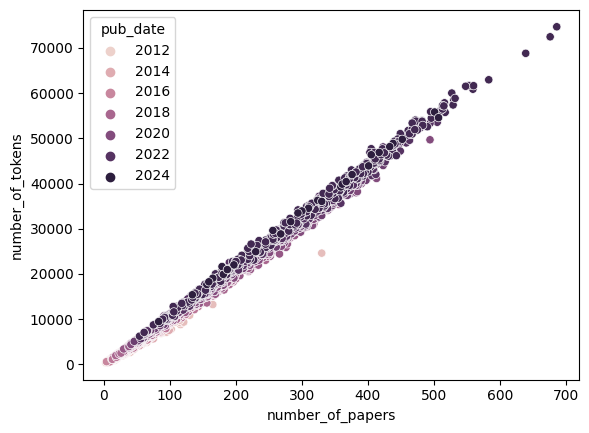

In [263]:
sns.scatterplot(x=date_df['number_of_papers'], y=date_df['number_of_tokens'],hue=pd.to_datetime(date_df['pub_date']).dt.year)

<Axes: ylabel='pub_date'>

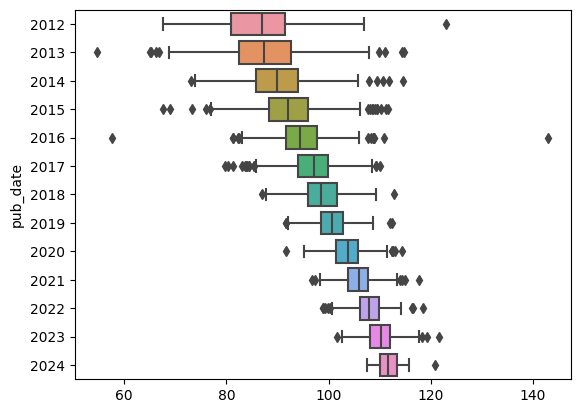

In [267]:
sns.boxplot(x=date_df['number_of_tokens'] / date_df['number_of_papers'],y=(pd.to_datetime(date_df['pub_date']).dt.year).astype('category'))

<Axes: ylabel='Count'>

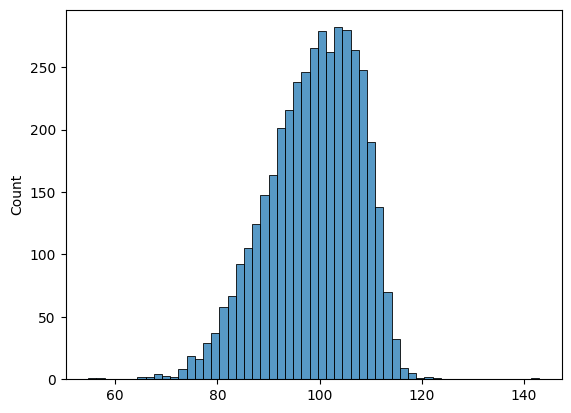

In [268]:
sns.histplot(date_df['number_of_tokens'] / date_df['number_of_papers'])

In [269]:
date_df.columns

Index(['pub_date', 'cleaned_text', 'number_of_papers', 'number_of_tokens',
       'unique_tokens', '000', '0001', '001', '002', '005',
       ...
       'zeta', 'zf', 'zhang', 'zhou', 'zigzag', 'zone', 'zoo', 'zoom',
       'zooming', 'zsl'],
      dtype='object', length=13859)

In [355]:
def common_token_counter(clean_string):
    return [j for j,k in Counter(clean_string.split()).most_common(25)]

In [356]:
top_tokens_list = Counter(" ".join([i for i in date_df['cleaned_text'].apply(common_token_counter).str.join(sep=' ')]).split())

In [357]:
top_tokens_list['llm']

60

In [358]:
len(top_tokens_list)

1661

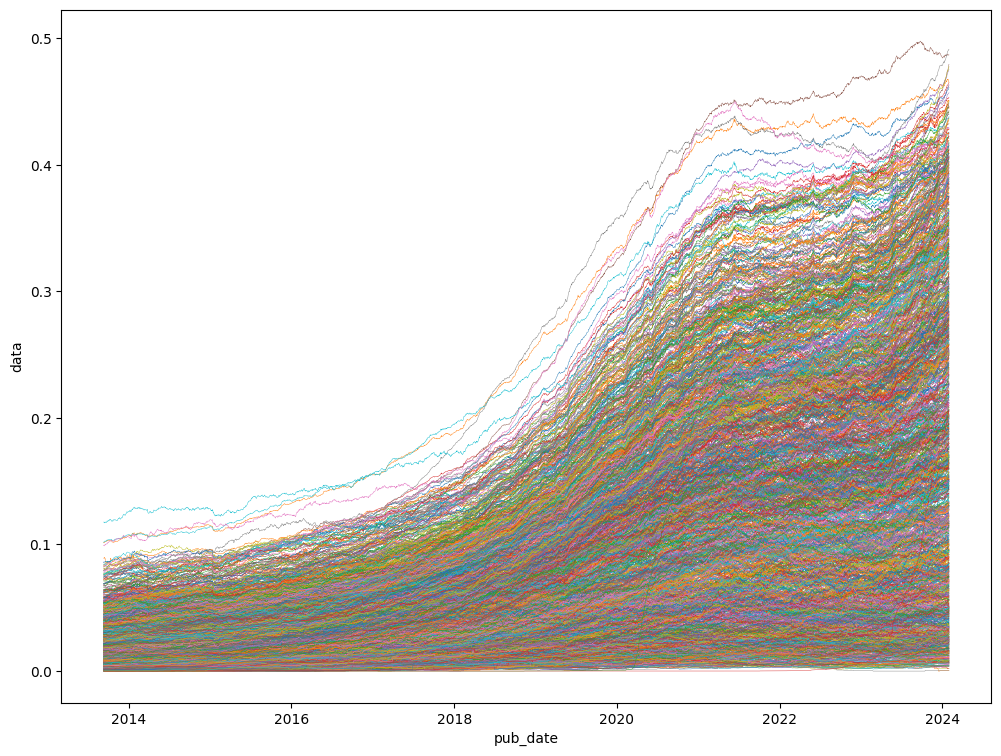

In [373]:
plt.figure(figsize=(12,9))
token_list = top_tokens_list

for i in token_list:
    try:
#        sns.lineplot(x=date_df['pub_date'], y=(date_df[i] / date_df['number_of_papers']).rolling(360).mean()*100, alpha=0.3)
        sns.lineplot(x=date_df['pub_date'], y=(date_df[i] / date_df[i].max()).rolling(360).mean(), linewidth=0.3)
    except:
        pass
#plt.title('Use of the word "neural"')
#plt.xlim(2016,2024)

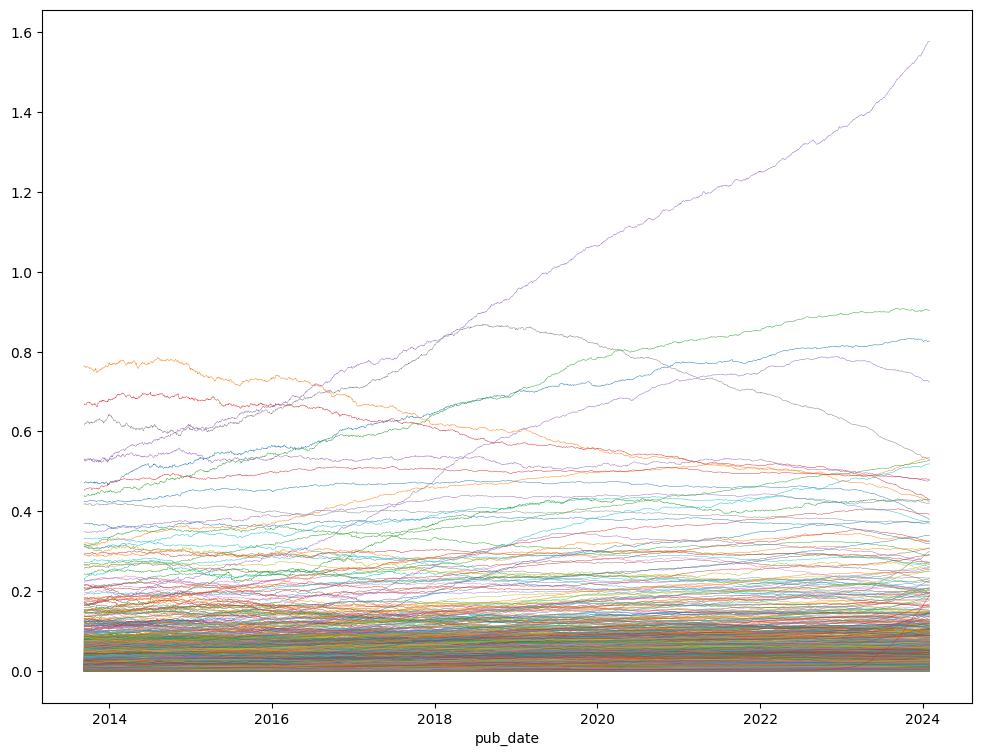

In [372]:
plt.figure(figsize=(12,9))
token_list = top_tokens_list

for i in token_list:
    try:
        sns.lineplot(x=date_df['pub_date'], y=(date_df[i] / date_df['number_of_papers']).rolling(360).mean(), linewidth=0.3)
    except:
        pass
#plt.title('Use of the word "neural"')
#plt.xlim(2016,2024)

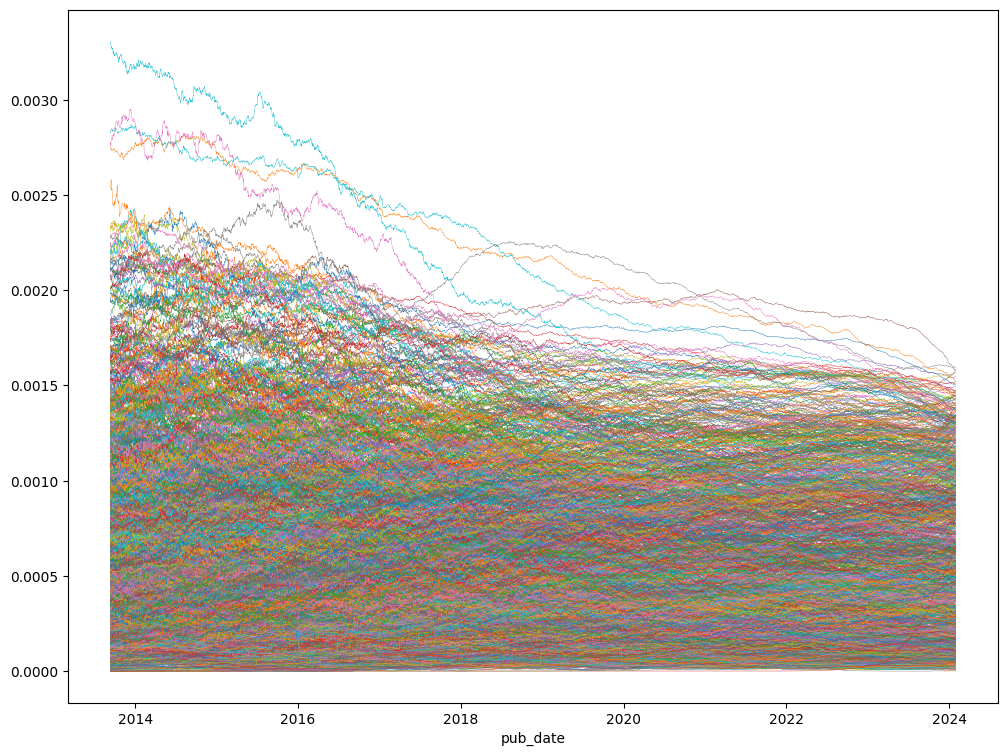

In [363]:
plt.figure(figsize=(12,9))
token_list = top_tokens_list

for i in token_list:
    try:
#        sns.lineplot(x=date_df['pub_date'], y=(date_df[i] / date_df['number_of_papers']).rolling(360).mean()*100, alpha=0.3)
        sns.lineplot(x=date_df['pub_date'], y=(date_df[i] / date_df['number_of_papers']).rolling(360).mean() / date_df[i].max(), linewidth=0.3,)
    except:
        pass